# Exploratory Data Analysis

In [ ]:
import sys
import os

# Add project root to path
project_root = os.path.abspath("..")
sys.path.append(project_root)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.data_ingestion import SupabaseIngestor

# Load config path
config_path = os.path.join(project_root, "src", "config", "config.yaml")

# Ingest full data using updated class with pagination
ingestor = SupabaseIngestor(config_path=config_path)
df = ingestor.load_data()  # load_data internally handles pagination

# Display basic information
print(f"Shape of DataFrame: {df.shape}")
display(df.head())


2025-07-26 15:07:12,107 [INFO] data_ingestion - Fetching data from Supabase table: transformed_customer_data
2025-07-26 15:07:13,683 [INFO] data_ingestion - Fetched batch with 1000 records (offset: 0)
2025-07-26 15:07:13,790 [INFO] data_ingestion - Fetched batch with 1000 records (offset: 1000)
2025-07-26 15:07:13,882 [INFO] data_ingestion - Fetched batch with 1000 records (offset: 2000)
2025-07-26 15:07:14,002 [INFO] data_ingestion - Fetched batch with 1000 records (offset: 3000)
2025-07-26 15:07:14,115 [INFO] data_ingestion - Fetched batch with 1000 records (offset: 4000)
2025-07-26 15:07:14,217 [INFO] data_ingestion - Fetched batch with 1000 records (offset: 5000)
2025-07-26 15:07:14,344 [INFO] data_ingestion - Fetched batch with 1000 records (offset: 6000)
2025-07-26 15:07:14,432 [INFO] data_ingestion - Fetched batch with 1000 records (offset: 7000)
2025-07-26 15:07:14,533 [INFO] data_ingestion - Fetched batch with 1000 records (offset: 8000)
2025-07-26 15:07:14,648 [INFO] data_ing

Shape of DataFrame: (10000, 8)


,customer_id,invoice_id,invoice_date,purchase_amount,product_category,payment_method,customer_segment,region
0,CUST_102,INV_0,2024-01-23,71.39,clothing,upi,loyal,north
1,CUST_435,INV_1,2024-02-23,56.88,clothing,credit card,returning,south
2,CUST_860,INV_2,2024-03-05,89.96,electronics,cash on delivery,loyal,east
3,CUST_270,INV_3,2024-05-19,26.58,beauty,cash on delivery,new,south
4,CUST_106,INV_4,2024-01-24,283.46,books,credit card,returning,north


In [3]:
# Check for missing values
df.isnull().sum()


customer_id         0
invoice_id          0
invoice_date        0
purchase_amount     0
product_category    0
payment_method      0
customer_segment    0
region              0
dtype: int64

In [4]:
# Basic statistics
df.describe()

,purchase_amount
count,10000.000000
mean,102.211699
std,102.497672
min,0.000000
25%,29.585000
50%,70.930000
75%,140.760000
max,949.570000


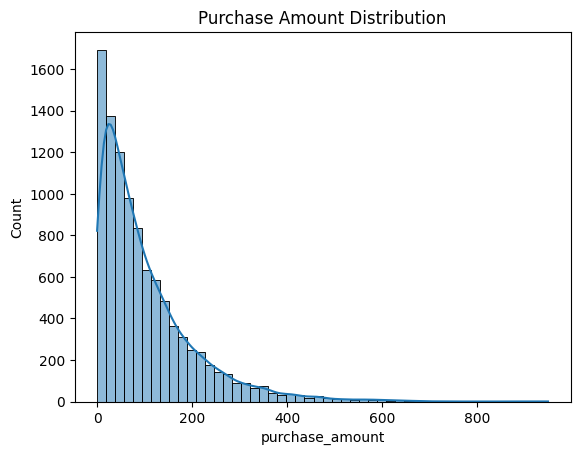

In [5]:
sns.histplot(df['purchase_amount'], bins=50, kde=True)
plt.title("Purchase Amount Distribution")
plt.show()

## Revenue by Category

In [6]:
df.groupby("product_category")['purchase_amount'].agg(['mean', 'sum', 'count']).sort_values(by='sum', ascending=False)

,mean,sum,count
product_category,,,
books,101.592238,212937.33,2096
electronics,104.738018,204029.66,1948
home,100.250015,203908.53,2034
clothing,102.621567,201754.00,1966
beauty,101.987459,199487.47,1956


## Revenue by Region

In [7]:
df.groupby("region")['purchase_amount'].agg(['mean', 'sum', 'count']).sort_values(by='sum', ascending=False)

,mean,sum,count
region,,,
north,103.360978,262020.08,2535
west,104.074766,260082.84,2499
south,100.410680,252432.45,2514
east,100.971297,247581.62,2452


##  Revenue by Segment

In [8]:
df.groupby("customer_segment")['purchase_amount'].agg(['mean', 'sum', 'count']).sort_values(by='sum', ascending=False)

,mean,sum,count
customer_segment,,,
new,106.232600,357047.77,3361
loyal,100.453197,332700.99,3312
returning,99.900280,332368.23,3327


## Monthly Revenue Trend

In [9]:

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['month'] = df['invoice_date'].dt.to_period('M')

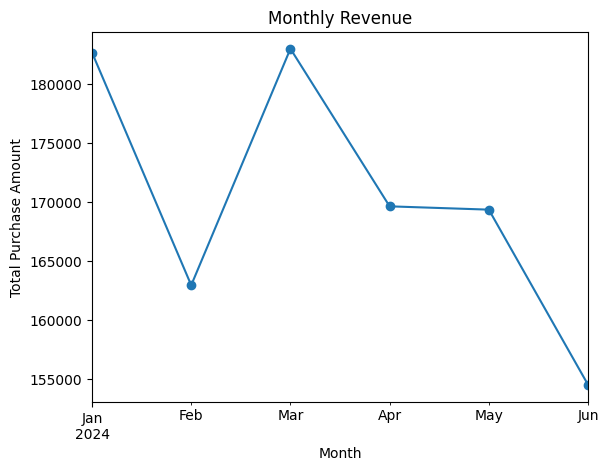

In [11]:
monthly_revenue = df.groupby('month')['purchase_amount'].sum()
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue")
plt.ylabel("Total Purchase Amount")
plt.xlabel("Month")
plt.show()

## Customer Analysis

In [13]:
# Customers by spend
df.groupby("customer_id")['purchase_amount'].sum().sort_values(ascending=False).head(10)

customer_id
CUST_110    3131.33
CUST_400    2887.32
CUST_692    2789.69
CUST_824    2560.07
CUST_821    2552.80
CUST_829    2524.41
CUST_536    2514.01
CUST_72     2477.25
CUST_699    2424.12
CUST_313    2380.87
Name: purchase_amount, dtype: float64

# Conclusions:
1. Books generate the most revenue and are also the most in demand.
2. North and West are the more profitable regions for the company.
3. New customers tend to spend more while loyal and returning customers average around the same.
4. Sales tend to be the highest in the month of January and March. Might be interesting to look into the reason behind this.